<a href="https://colab.research.google.com/github/kavyaaa57/Bi-Visie/blob/main/ImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop



In [9]:
img=image.load_img("/content/drive/MyDrive/IR_MODEL/basedata/train/priya/p2.jpeg")

array([[[202, 203, 201],
        [202, 203, 201],
        [202, 203, 201],
        ...,
        [198, 198, 192],
        [198, 198, 192],
        [198, 198, 192]],

       [[202, 203, 201],
        [202, 203, 201],
        [202, 203, 201],
        ...,
        [198, 198, 192],
        [198, 198, 192],
        [198, 198, 192]],

       [[202, 203, 201],
        [202, 203, 201],
        [202, 203, 201],
        ...,
        [198, 198, 192],
        [198, 198, 192],
        [198, 198, 192]],

       ...,

       [[172, 175, 173],
        [172, 175, 173],
        [172, 175, 173],
        ...,
        [201, 204, 202],
        [201, 204, 202],
        [201, 204, 202]],

       [[173, 176, 174],
        [173, 176, 174],
        [173, 176, 174],
        ...,
        [201, 204, 202],
        [201, 204, 202],
        [201, 204, 202]],

       [[174, 177, 175],
        [174, 177, 175],
        [174, 177, 175],
        ...,
        [201, 204, 202],
        [201, 204, 202],
        [201, 204, 202]]], dtype=uint8)
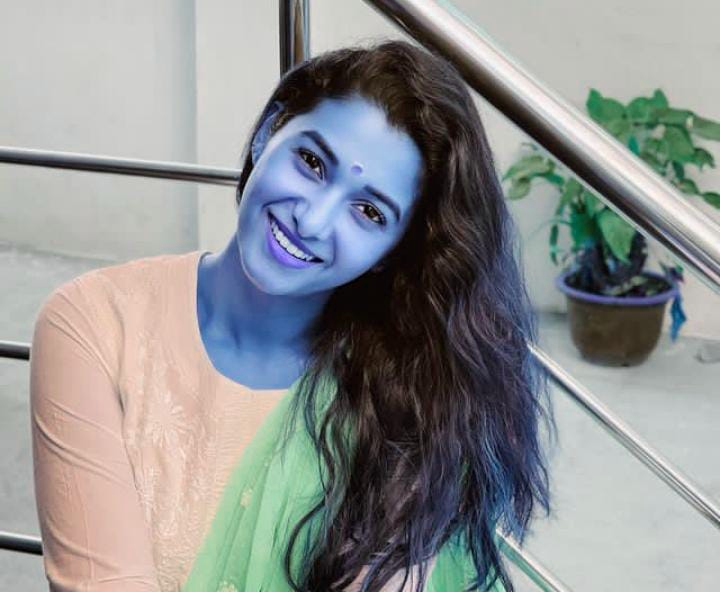

In [10]:
cv2.imread("/content/drive/MyDrive/IR_MODEL/basedata/train/priya/p2.jpeg")

In [12]:
cv2.imread("/content/drive/MyDrive/IR_MODEL/basedata/train/priya/p2.jpeg").shape

(592, 720, 3)

In [13]:
train = ImageDataGenerator(rescale= 1/255)
validation=ImageDataGenerator(rescale=1/255)

In [14]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/IR_MODEL/basedata/train',
                                        target_size=(200,200),
                                        batch_size = 3,
                                        class_mode='binary')
validation_dataset=train.flow_from_directory('/content/drive/MyDrive/IR_MODEL/basedata/validation',
                                        target_size=(200,200),
                                        batch_size = 3,
                                        class_mode='binary')

Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [15]:
train_dataset.class_indices


{'amala': 0, 'priya': 1}

In [16]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
                                 metrics=['accuracy'])

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=5,
                    epochs=100,
                    validation_data=validation_dataset)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 771ms/step - accuracy: 0.3417 - loss: 0.9651 - val_accuracy: 0.5000 - val_loss: 0.6802
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.3333 - loss: 0.7027 - val_accuracy: 0.8889 - val_loss: 0.6783
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.7574 - loss: 0.6810 - val_accuracy: 0.8889 - val_loss: 0.6551
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.6667 - loss: 0.6733 - val_accuracy: 0.7778 - val_loss: 0.6484
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - accuracy: 0.7139 - loss: 0.6414 - val_accuracy: 0.8333 - val_loss: 0.5976
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6667 - loss: 0.6156 - val_accuracy: 0.8333 - val_loss: 0.5949
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 356ms/step - accuracy: 0.6611 - loss: 0.5897 - val_accuracy: 1.0000 - val_loss: 0.4474
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 1.0000 - loss: 0.3954 - val_accuracy: 0.7222 - va

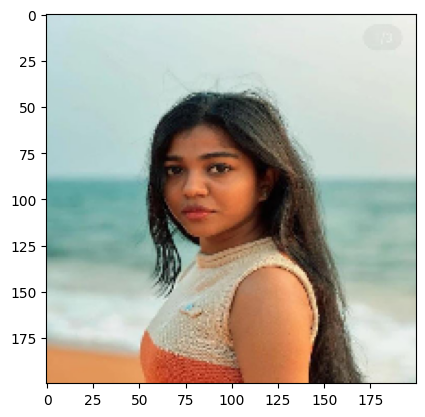

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Amala


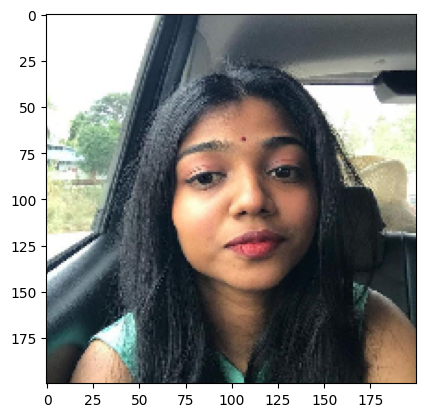

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Amala


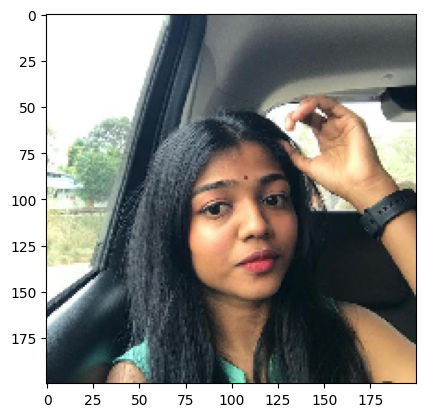

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Amala


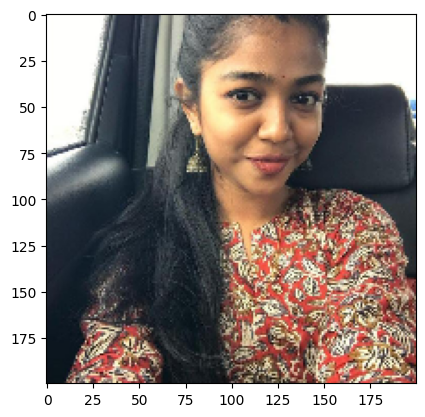

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Amala


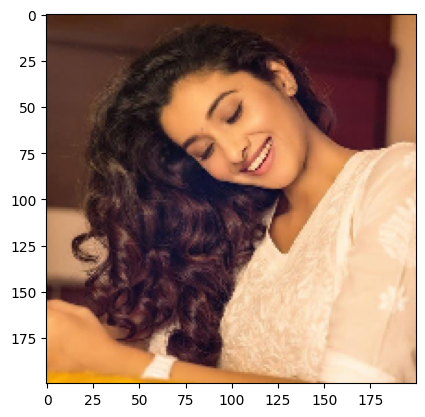

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Priya


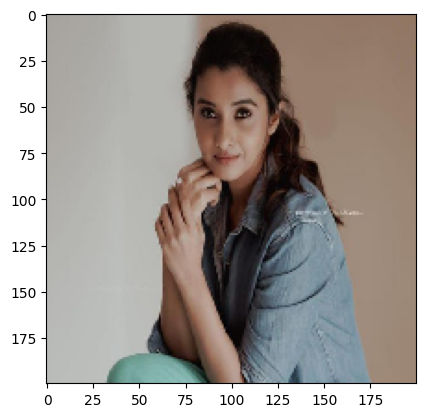

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Priya


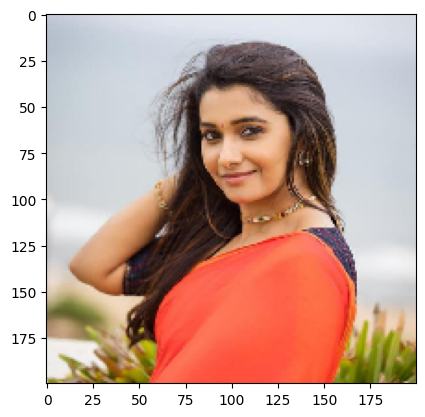

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Priya


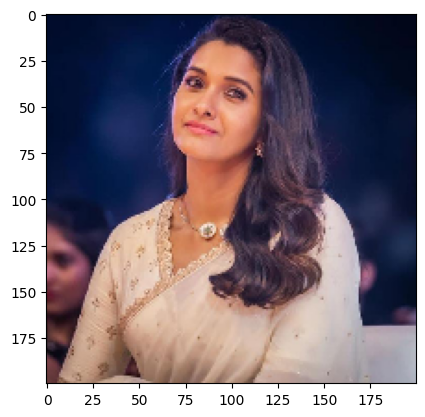

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Priya


In [25]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = "/content/drive/MyDrive/IR_MODEL/basedata/test"
for root, dirs, files in os.walk(dir_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)

        if file_path.endswith(('.png', '.jpg', '.jpeg')):
            img = image.load_img(file_path, target_size=(200, 200))
            plt.imshow(img)
            plt.show()

            X = image.img_to_array(img)
            X = np.expand_dims(X, axis=0)
            images = np.vstack([X])

            val = model.predict(images)

            if val == 0:
                print("Amala")
            else:
                print("Priya")
        else:
            print(f"Skipping non-image file: {file_name}")